In [1]:
import numpy  as np
import pandas as pd
import gc
import pprint
import hashlib

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn           as sns

from IPython.display import display

In [4]:
df = pd.read_csv('~/Documents/data/cartola-fc-brasil-scouts/jogadores.csv')

df['id']  = df['Nome'].apply( lambda x: hashlib.sha1(str.encode(x)).hexdigest() )
df['pos'] = df['Nome'].apply( lambda x: x.split('(')[-1].split(')')[0].strip() )

display( df.sort_values(by="Nome") )

scouts  = ['DS','G','A','SG','FS','FF','FD','FT','DD','DP','GC','CV','CA','PP','GS','FC','I','PI','RB','PE']
mercado = ['Preço', 'Média','Variação']
keys    = ["id", "ano"]

gscouts = df.groupby(keys)[scouts].agg(['sum'])
gscouts.columns = gscouts.columns.map('_'.join)
gscouts = gscouts.reset_index()

gmercado = df.groupby(keys)[mercado].agg(['sum'])
gmercado.columns = gmercado.columns.map('_'.join)
gmercado = gmercado.reset_index()

gpos = df.groupby(keys)[['pos']].agg(['first'])
gpos.columns = gpos.columns.map('_'.join)
gpos = gpos.reset_index()

display(gscouts.sample(5))
display(gmercado.sample(5))
display(gpos.sample(5))

display(gpos['pos_first'].value_counts())

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,GS,FC,I,PI,rodada,ano,RB,PE,id,pos
7240,Abel Braga (TEC),Internacional,11.46,16.0,3.78,4.74,0.73,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
6793,Abel Braga (TEC),Internacional,11.31,14.0,3.96,3.14,-0.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
6213,Abel Braga (TEC),Internacional,11.71,11.0,4.11,7.06,0.48,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
8622,Abel Braga (TEC),Flamengo,10.28,4.0,3.58,4.30,0.43,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,2019,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
8840,Abel Braga (TEC),Flamengo,10.53,5.0,3.82,4.79,0.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5,2019,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14192,Éverson (GOL),Santos,9.79,23.0,4.25,8.00,-0.06,NaN,NaN,NaN,...,20.0,1.0,NaN,NaN,29,2019,NaN,34.0,6d99fcc3bc6b30aced0353e17beee4f211c2ee4a,GOL
10828,Éverson (GOL),Santos,8.62,8.0,4.36,6.20,1.45,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,14,2019,NaN,7.0,6d99fcc3bc6b30aced0353e17beee4f211c2ee4a,GOL
7848,Ênio (MEI),Botafogo,0.85,4.0,1.35,-0.20,-0.53,2.0,NaN,NaN,...,NaN,1.0,1.0,12.0,38,2020,NaN,NaN,98db7cfc8e99fe42e23ab3d1f8b9359815e9c023,MEI
7589,Ênio (MEI),Botafogo,1.38,3.0,1.87,3.10,0.32,2.0,NaN,NaN,...,NaN,NaN,1.0,3.0,37,2020,NaN,NaN,98db7cfc8e99fe42e23ab3d1f8b9359815e9c023,MEI


,id,ano,DS_sum,G_sum,A_sum,SG_sum,FS_sum,FF_sum,FD_sum,FT_sum,...,GC_sum,CV_sum,CA_sum,PP_sum,GS_sum,FC_sum,I_sum,PI_sum,RB_sum,PE_sum
103,1070eac2675970f721325555e51ec3dca17f2f34,2019,0.0,0.0,0.0,203.0,98.0,0.0,0.0,0.0,...,0.0,0.0,105.0,0.0,353.0,6.0,0.0,0.0,0.0,198.0
980,c585a65dba9c02ed6982c5bac3ff0cbfa6bb1eb9,2020,25.0,4.0,0.0,0.0,27.0,4.0,7.0,1.0,...,0.0,0.0,4.0,0.0,0.0,28.0,0.0,46.0,0.0,0.0
376,486644ef428610e4ee21b5d9310f9f4072a00954,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,25.0,2.0,0.0,0.0,0.0,1.0
866,ad45ef10896ac25c2d524d760f8247761cff99e3,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,2e393beae85d87e886f047a21f82854dbaf4ab28,2020,121.0,42.0,44.0,0.0,469.0,195.0,120.0,2.0,...,0.0,0.0,82.0,0.0,0.0,160.0,47.0,1964.0,0.0,0.0


,id,ano,Preço_sum,Média_sum,Variação_sum
94,0fa11dad9d61e3ccb3f132858c51f6520dfff1f6,2019,25.80,12.95,-0.30
223,2868443f2cdbd7100fe3033135288641287182e8,2019,52.27,16.58,4.07
555,6c5768ec16c685cc77da1be833cbac231f0cbd2d,2020,15.13,3.75,-0.37
553,6beb3ff61e1b158018f7eac26d800dfd2294c6c8,2020,105.84,52.73,1.38
525,660b61454e4aa9494d5da64cb1f0576ee75366c0,2019,120.48,48.78,0.17


,id,ano,pos_first
218,27d9346ea904aab635ba798297b9455fd7ffd9b0,2019,ZAG
99,0fc179a3825106bbbef9d89aa99219a640464ff6,2020,LAT
972,c4a5a1526e49219b3d63da63c76e94ac3bd4900f,2019,LAT
400,4e745e6c70e2443037fee786bb018b7806f3bf00,2020,LAT
311,3a26ed95a7e47feec36be8b2b86797f75d4f2d57,2020,MEI


MEI    408
ATA    285
ZAG    203
LAT    200
GOL     96
TEC     91
Name: pos_first, dtype: int64

In [11]:
X = pd.concat([gscouts.drop(columns=keys), 
               gmercado.drop(columns=keys),
               gpos['pos_first']], axis=1).copy()

X.sample(5)

,DS_sum,G_sum,A_sum,SG_sum,FS_sum,FF_sum,FD_sum,FT_sum,DD_sum,DP_sum,...,GS_sum,FC_sum,I_sum,PI_sum,RB_sum,PE_sum,Preço_sum,Média_sum,Variação_sum,pos_first
277,0.0,37.0,144.0,0.0,388.0,283.0,133.0,30.0,0.0,0.0,...,0.0,906.0,13.0,0.0,1258.0,1253.0,446.11,165.50,6.09,MEI
862,16.0,0.0,0.0,0.0,31.0,36.0,15.0,0.0,0.0,0.0,...,0.0,38.0,7.0,220.0,0.0,0.0,22.97,5.90,-2.10,ATA
43,0.0,56.0,0.0,0.0,265.0,192.0,88.0,0.0,0.0,0.0,...,0.0,166.0,116.0,0.0,133.0,337.0,143.04,65.85,6.51,ATA
843,0.0,0.0,0.0,38.0,45.0,0.0,0.0,0.0,188.0,0.0,...,199.0,0.0,0.0,1612.0,0.0,0.0,89.99,28.79,-3.38,GOL
623,0.0,22.0,15.0,0.0,377.0,109.0,43.0,0.0,0.0,0.0,...,0.0,324.0,0.0,0.0,536.0,431.0,179.22,81.29,2.32,MEI


- - -

uma boa forma de classificar os tipos de visualizações é separar entre os de

1. correlação
2. dispersão
3. ordenação
4. distribuição
5. composição
6. evolução
7. agrupamento

# correlação

## counts plot

In [170]:
D = X.query(" pos_first != 'TEC' & pos_first != 'MEI' & pos_first != 'GOL' ").copy()
D["pos_at_field"] = np.where(D["pos_first"].isin(['LAT', 'ZAG']), "defensor", "delantero")
D["Preço_sum"] = D["Preço_sum"].astype(np.int64)
D["Média_sum"] = D["Média_sum"].astype(np.int64)
D['bin_Preço_sum'] = pd.cut(D["Preço_sum"], np.arange(D["Preço_sum"].min(), D["Preço_sum"].max(), 10) )
D['bin_Média_sum'] = pd.cut(D["Média_sum"], np.arange(D["Média_sum"].min(), D["Média_sum"].max(), 10) )

d = D.groupby(["pos_at_field", 'bin_Preço_sum', 'bin_Média_sum'])['Preço_sum'].count().reset_index(name="counts")

In [171]:
d

,pos_at_field,bin_Preço_sum,bin_Média_sum,counts
0,defensor,"(0, 10]","(-9, 1]",41
1,defensor,"(0, 10]","(1, 11]",33
2,defensor,"(0, 10]","(11, 21]",1
3,defensor,"(0, 10]","(21, 31]",0
4,defensor,"(0, 10]","(31, 41]",0
...,...,...,...,...
4087,delantero,"(650, 660]","(251, 261]",0
4088,delantero,"(650, 660]","(261, 271]",0
4089,delantero,"(650, 660]","(271, 281]",0
4090,delantero,"(650, 660]","(281, 291]",0


In [172]:
d['bin_preco_sum'] = d['bin_Preço_sum'].astype(str).str.replace("(", "", regex=False).str.split(pat=",", expand=True)[0].astype(np.int64)
d['bin_media_sum'] = d['bin_Média_sum'].astype(str).str.replace("(", "", regex=False).str.split(pat=",", expand=True)[0].astype(np.int64)

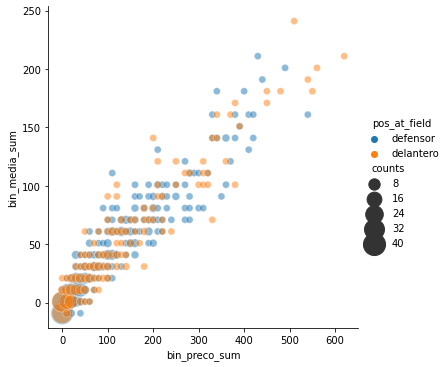

In [182]:
ax = sns.relplot(x='bin_preco_sum', y='bin_media_sum', hue='pos_at_field', size='counts', alpha=.5, data=d.query(" counts > 0 "), sizes=(50, 500))

# dispersão

# ordenação

# distribuição

## _box plot_

![ref: https://publiclab.org/notes/mimiss/06-18-2019/creating-a-boxplot-to-identify-outliers-using-codap](../img/boxplot_0.png)

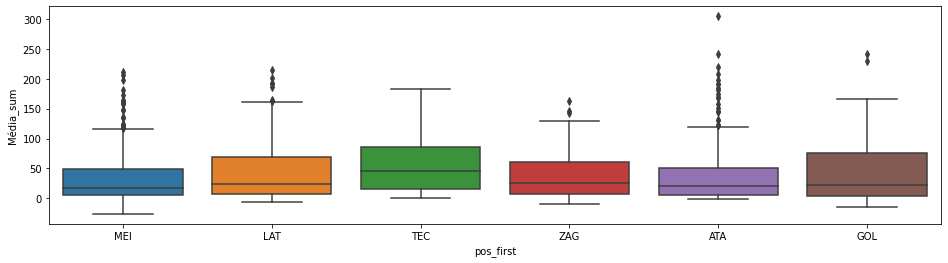

In [41]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16,4))

ax = sns.boxplot(x="pos_first", y="Média_sum", data=X, ax=ax1)

pos_first,ATA,GOL,LAT,MEI,TEC,ZAG
Média_sum,21.17,22.305,24.23,17.875,45.07,25.37


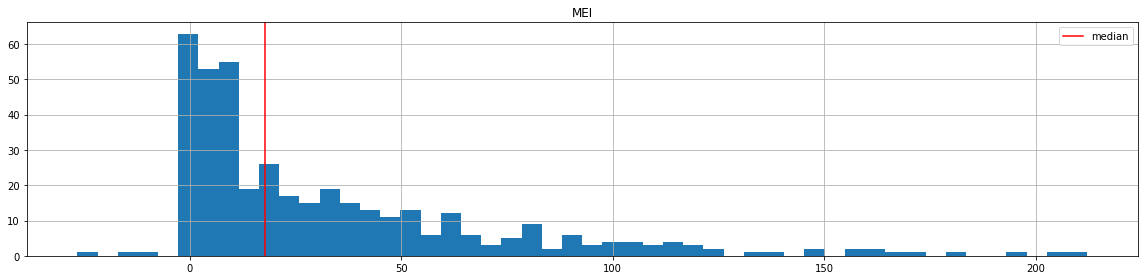

In [43]:
display( X.groupby(['pos_first']).agg({"Média_sum": "median"}).T )

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16,4))

X.query(" pos_first == 'MEI' ").hist("Média_sum", bins=50, ax=ax1)
ax1.axvline(X.query(" pos_first == 'MEI' ")['Média_sum'].median(), color='r', label="median")

plt.title("MEI")
plt.legend()
plt.tight_layout()
plt.show()

## _violin plot_

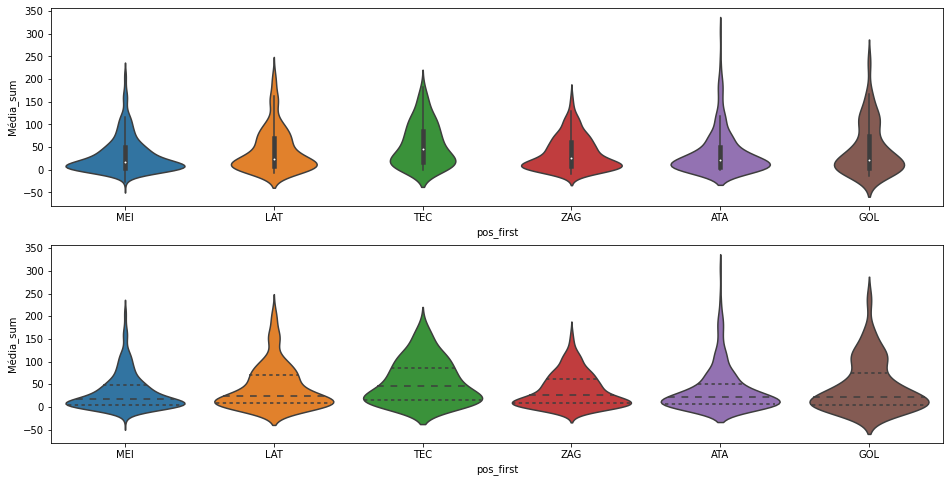

In [45]:
fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(16,8))

p1 = sns.violinplot(x="pos_first", y="Média_sum", data=X, ax=ax1)
p2 = sns.violinplot(x="pos_first", y="Média_sum", data=X, ax=ax2, scale='width', inner='quartile')

## population pyramid

In [63]:
D = X.query(" pos_first != 'TEC' & pos_first != 'MEI' & pos_first != 'GOL' ").copy()
D["pos_at_field"] = np.where(D["pos_first"].isin(['LAT', 'ZAG']), "defensor", "delantero")

D["bin_pts"] = pd.qcut(D["Média_sum"], 10)

In [94]:
d = D.groupby(["pos_at_field", "bin_pts"])[['Média_sum']].count().reset_index().rename(columns={"Média_sum":"count"}).copy()
d['count'] = np.where(d['pos_at_field'].isin(['delantero']), d['count'], d['count']*(-1))
d

,pos_at_field,bin_pts,count
0,defensor,"(-9.081, 1.161]",-42
1,defensor,"(1.161, 4.2]",-34
2,defensor,"(4.2, 9.195]",-35
3,defensor,"(9.195, 15.092]",-49
4,defensor,"(15.092, 22.81]",-36
5,defensor,"(22.81, 34.544]",-33
6,defensor,"(34.544, 49.169]",-39
7,defensor,"(49.169, 70.282]",-48
8,defensor,"(70.282, 101.377]",-49
9,defensor,"(101.377, 305.03]",-38


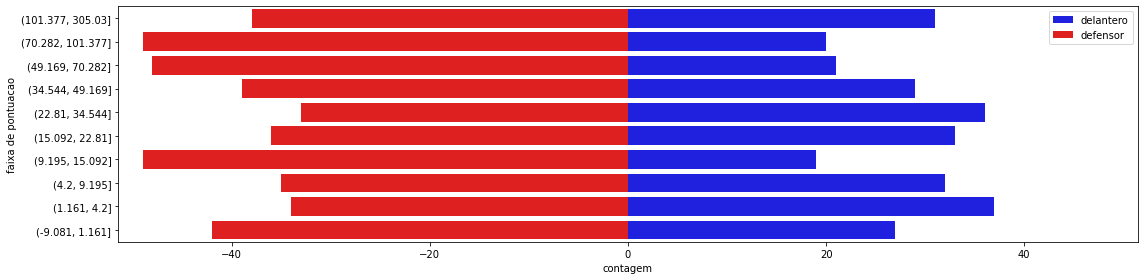

In [103]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16,4))

ax = sns.barplot(x="count", y="bin_pts", data=d.query(" pos_at_field == 'delantero' "),
                 order=d['bin_pts'].cat.categories.values[::-1],
                 orient="horizontal", color="blue", lw=0, ax=ax1, label="delantero")
ax = sns.barplot(x="count", y="bin_pts", data=d.query(" pos_at_field == 'defensor' "),
                 order=d['bin_pts'].cat.categories.values[::-1],
                 orient="horizontal", color="red", lw=0, ax=ax1, label="defensor")

_max = abs(d['count']).max()
_max = _max + 0.05*_max
plt.xlim([-_max, _max])
plt.xlabel("contagem")
plt.ylabel("faixa de pontuacao")
plt.legend()
plt.tight_layout()
plt.show()

# composição

## waffle chart

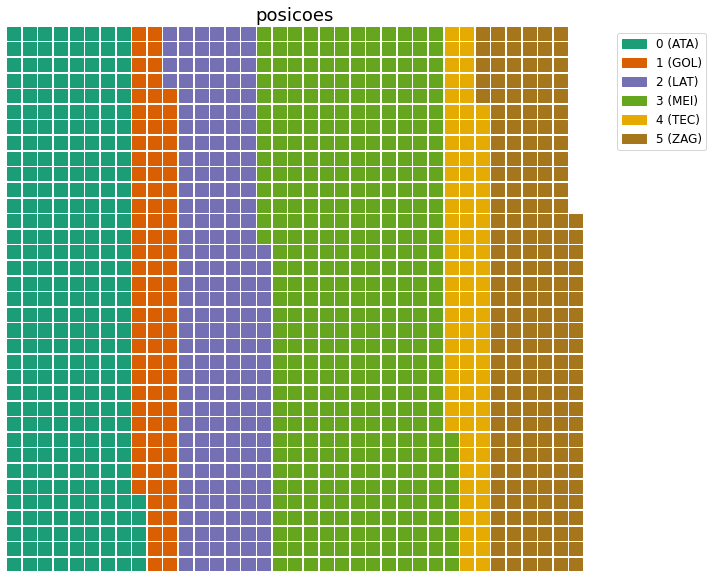

In [210]:
from pywaffle import Waffle

D  = X.groupby(['pos_first']).size().reset_index(name='counts')
nD = D.shape[0]
colors = [plt.cm.Dark2(i/float(nD)) for i in range(nD)]

fig = plt.figure(
           FigureClass = Waffle,
                 plots = {
                          '111': {
                                  'values': D['counts'],
                                  'labels': ["{0} ({1})".format(n[0], n[1]) for n in D[['pos_first', 'counts']].itertuples()],
                                  'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
                                  'title': {'label': 'posicoes', 'loc': 'center', 'fontsize':18}
                                 },
                         },
                rows    = np.int(np.sqrt(D['counts'].sum())),
                colors  = colors,
                figsize = (10, 10)
)

## treemap

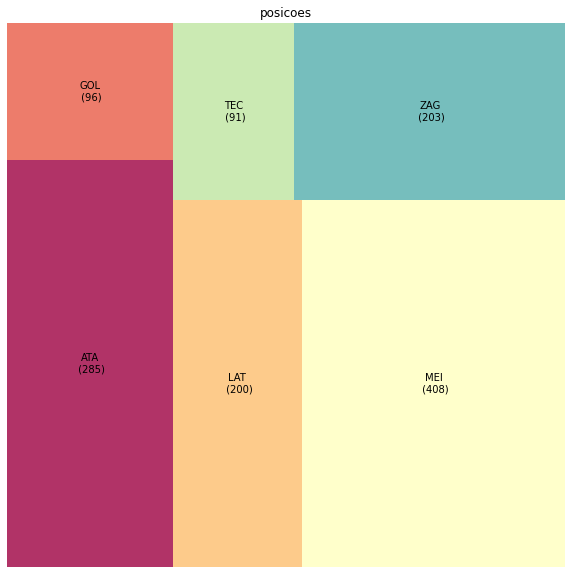

In [213]:
import squarify

D      = X.groupby(['pos_first']).size().reset_index(name='counts')
labels = D.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes  = D['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(10, 10))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('posicoes')
plt.axis('off')
plt.show()

# evolução

# agrupamento

- - -

**referências**

[top 50 matplotlib visualizations](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#24.-Joy-Plot)